## Decision Tree- Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [2]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()  # object veriler var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any()  # missing vaule yok

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


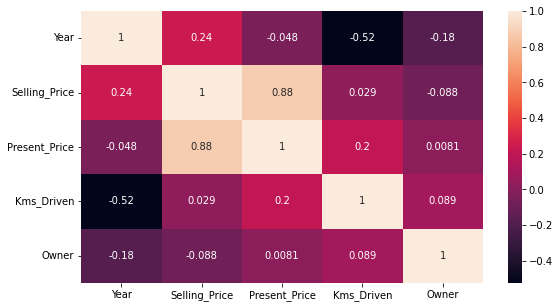

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df["vehicle_age"]=2022-df.Year  # arabanin yasi sütununu ekliyorum

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [11]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [12]:
len(df.Car_Name.value_counts())  # data zaten kücük. 98 tane unique value gereksiz

98

In [13]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

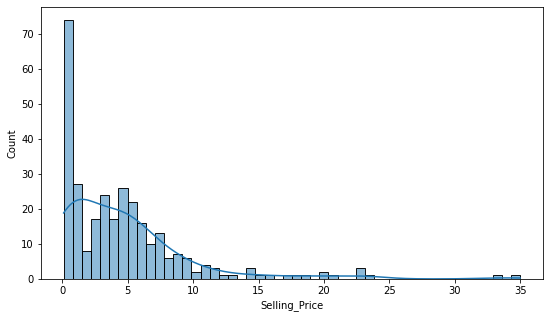

In [15]:
sns.histplot(df.Selling_Price, bins=50, kde=True)

<AxesSubplot:xlabel='Selling_Price'>

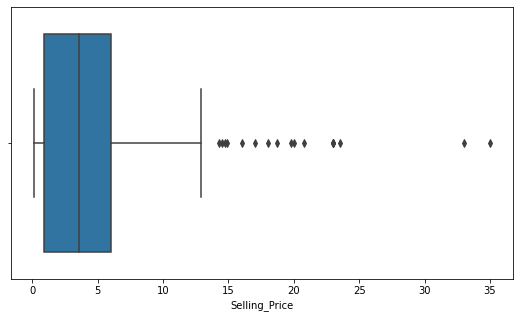

In [16]:
sns.boxplot(df.Selling_Price)  # 10dan sonra cok fazla outlier gözüküyor

In [17]:
df2 = df.copy()

## Train test split

In [18]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 7)
Train target shape   :  (240,)
Test features shape  :  (61, 7)
Test target shape    :  (61,)


## OrdinalEncoder and Categoric Variable

In [20]:
cat = X_train.select_dtypes("object").columns
cat  # kategorikleri cektim

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [21]:
X_train[cat]

,Fuel_Type,Seller_Type,Transmission
282,Diesel,Dealer,Manual
158,Petrol,Individual,Manual
9,Diesel,Dealer,Manual
33,Diesel,Dealer,Manual
224,Petrol,Dealer,Automatic
69,Petrol,Dealer,Manual
172,Petrol,Individual,Manual
221,Petrol,Dealer,Automatic
90,Petrol,Dealer,Manual
159,Petrol,Individual,Automatic


In [22]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit_transform(X_train[cat])  # numeric hale getirdim

array([[1., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [2., 0., 0.],
       [2., 0., 1.],
       [2., 1., 1.],
       [2., 0., 0.],
       [2., 0., 1.],
       [2., 1., 0.],
       [2., 0., 1.],
       [2., 1., 1.],
       [0., 0., 1.],
       [1., 0., 1.],
       [2., 0., 1.],
       [1., 0., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 0., 1.],
       [2., 0., 0.],
       [1., 0., 1.],
       [2., 1., 0.],
       [2., 0., 1.],
       [2., 0., 1.],
       [2., 0., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [2., 1., 1.],
       [2., 0., 1.],
       [2., 0., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 0., 1.],
       [2., 1., 1.],
       [2., 0., 1.],
       [2., 0., 1.],
       [2., 1., 1.],
       [0., 0., 1.],
       [2., 0., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 0., 1.],
       [2., 1

In [23]:
X_train[cat] = enc.fit_transform(X_train[cat])

In [24]:
X_train.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
282,14.00,63000,1.0,0.0,1.0,0,8
158,0.54,8600,2.0,1.0,1.0,0,5
9,8.92,42367,1.0,0.0,1.0,0,7
33,9.95,45000,1.0,0.0,1.0,0,8
224,9.40,36198,2.0,0.0,0.0,0,9


In [25]:
X_test[cat]=enc.transform(X_test[cat])

In [26]:
X_test.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
176,1.05,30000,2.0,1.0,1.0,0,11
253,9.90,48000,1.0,0.0,1.0,0,8
12,9.94,15000,2.0,0.0,0.0,0,7
16,10.79,41678,1.0,0.0,1.0,0,7
193,0.65,24000,2.0,1.0,1.0,1,9


## Modeling with Pipeline

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [28]:
X_train.head(2)

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
282,14.00,63000,Diesel,Dealer,Manual,0,8
158,0.54,8600,Petrol,Individual,Manual,0,5


In [29]:
X_test.head(2)

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
176,1.05,30000,Petrol,Individual,Manual,0,11
253,9.90,48000,Diesel,Dealer,Manual,0,8


In [30]:
# yukarida categorik olanlari pipeline ile kolayca numeric yapiyorum

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model', DecisionTreeRegressor(random_state=101))])

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [33]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [34]:
pd.options.display.float_format = '{:.3f}'.format  # küsurati sinirlandirdim

In [35]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.000,0.933
mae,0.000,0.512
mse,0.000,0.646
rmse,0.000,0.804


In [36]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeRegressor(random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10,
                       return_train_score=True)

df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                              0.872
train_r2                             1.000
test_neg_mean_absolute_error        -0.828
train_neg_mean_absolute_error        0.000
test_neg_mean_squared_error         -4.450
train_neg_mean_squared_error         0.000
test_neg_root_mean_squared_error    -1.665
train_neg_root_mean_squared_error    0.000
dtype: float64

## Removing Outliers

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


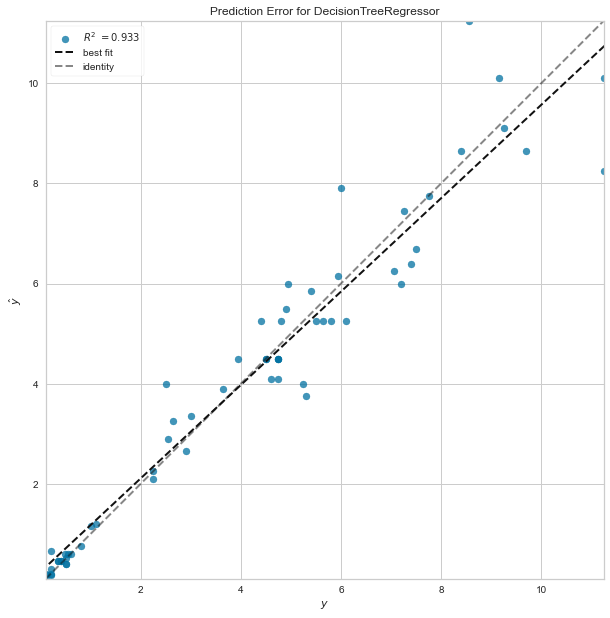

In [37]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))

model = pipe_model
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

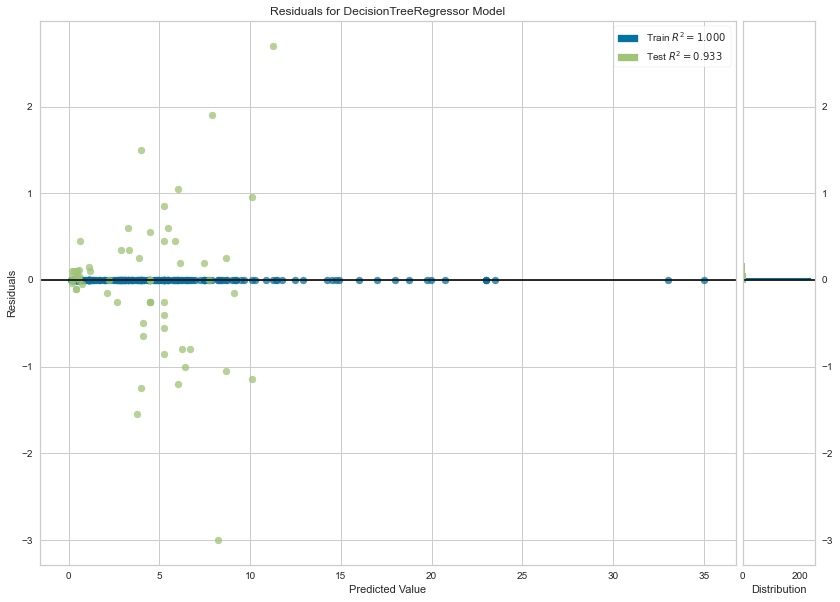

In [38]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = pipe_model
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();       

In [39]:
len(df[df.Selling_Price > 10])

28

In [40]:
28/301

0.09302325581395349

In [41]:
df_new = df[df.Selling_Price < 10]
df_new

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.350,5.590,27000,Petrol,Dealer,Manual,0,8
1,4.750,9.540,43000,Diesel,Dealer,Manual,0,9
2,7.250,9.850,6900,Petrol,Dealer,Manual,0,5
3,2.850,4.150,5200,Petrol,Dealer,Manual,0,11
4,4.600,6.870,42450,Diesel,Dealer,Manual,0,8
5,9.250,9.830,2071,Diesel,Dealer,Manual,0,4
6,6.750,8.120,18796,Petrol,Dealer,Manual,0,7
7,6.500,8.610,33429,Diesel,Dealer,Manual,0,7
8,8.750,8.890,20273,Diesel,Dealer,Manual,0,6
9,7.450,8.920,42367,Diesel,Dealer,Manual,0,7


In [42]:
X = df_new.drop(columns="Selling_Price")
y = df_new.Selling_Price

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [44]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model', DecisionTreeRegressor(random_state=101))])

In [45]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.000,0.935
mae,0.000,0.493
mse,0.000,0.533
rmse,0.000,0.730


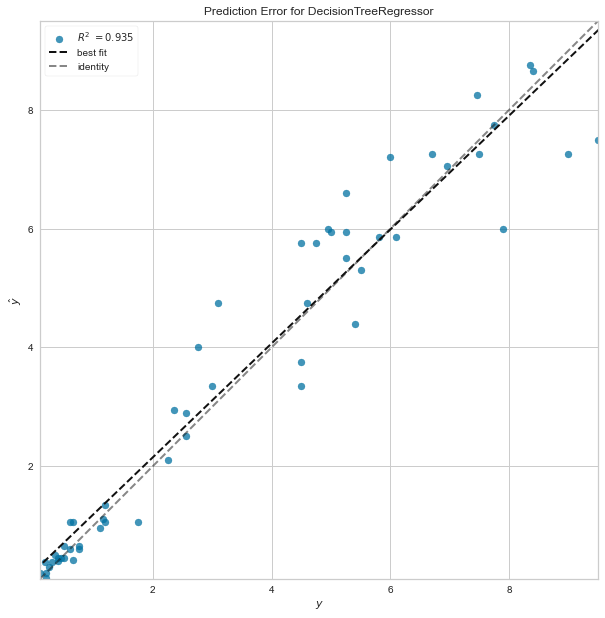

In [46]:
visualizer = RadViz(size=(720, 3000))

model = pipe_model
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

## Visualizing trees

In [47]:
from sklearn.tree import plot_tree

In [48]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['ordinalencoder__Fuel_Type', 'ordinalencoder__Seller_Type',
       'ordinalencoder__Transmission', 'remainder__Present_Price',
       'remainder__Kms_Driven', 'remainder__Owner',
       'remainder__vehicle_age'], dtype=object)

In [49]:
new_features = [i.replace("ordinalencoder__","").replace("remainder__", "") for i in features]
new_features

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'vehicle_age']

In [50]:
pd.DataFrame(pipe_model["OrdinalEncoder"].fit_transform(X_train), columns=new_features)

,Fuel_Type,Seller_Type,Transmission,Present_Price,Kms_Driven,Owner,vehicle_age
0,2.000,1.000,1.000,0.540,14000.000,0.000,6.000
1,2.000,0.000,1.000,4.600,22517.000,0.000,11.000
2,2.000,0.000,1.000,5.900,9800.000,0.000,9.000
3,1.000,0.000,1.000,9.400,49000.000,0.000,9.000
4,2.000,0.000,1.000,18.610,72000.000,0.000,10.000
5,2.000,1.000,1.000,0.870,15000.000,0.000,6.000
6,2.000,0.000,1.000,7.600,50456.000,0.000,16.000
7,2.000,0.000,1.000,6.760,40000.000,0.000,8.000
8,2.000,1.000,1.000,2.400,7000.000,0.000,8.000
9,2.000,1.000,1.000,2.280,127000.000,0.000,19.000


In [51]:
X_train.head(1)

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
164,0.540,14000,Petrol,Individual,Manual,0,6


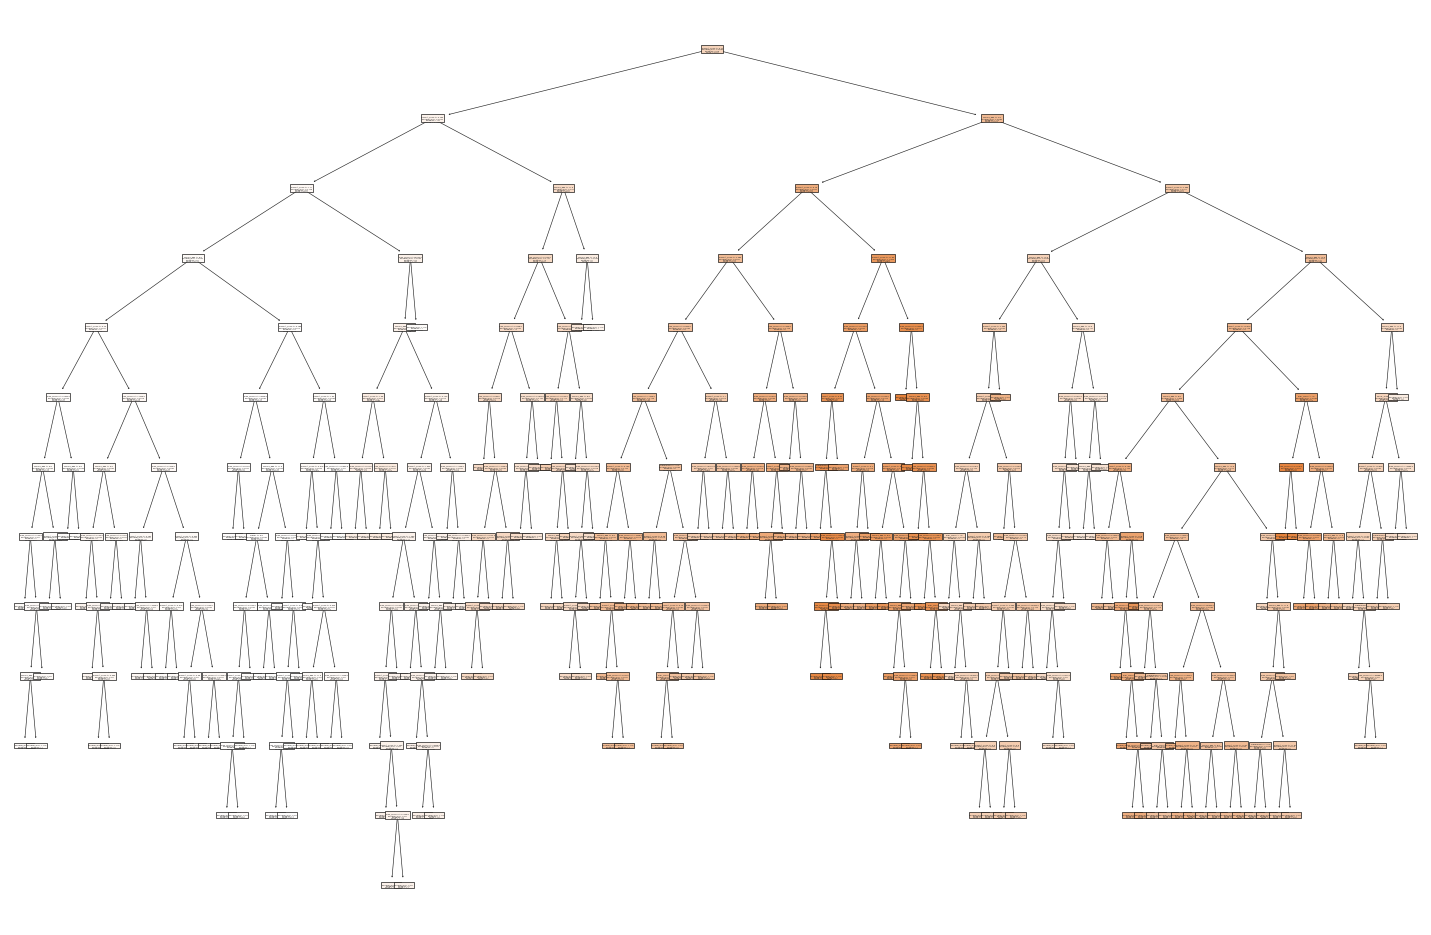

In [52]:
plt.figure(figsize=(12,8), dpi=150)
plot_tree(pipe_model["DT_model"], filled=True, feature_names=new_features); #feature_names=X.columns

In [53]:
def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["DT_model"],filled=True, feature_names=new_features, fontsize=8); #feature_names=X.columns

In [54]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeRegressor(max_depth=3, random_state=101))]

pruned_tree = Pipeline(steps=operations)
pruned_tree.fit(X_train,y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeRegressor(max_depth=3, random_state=101))])



      train  test
R2    0.873 0.928
mae   0.591 0.524
mse   0.874 0.589
rmse  0.935 0.768




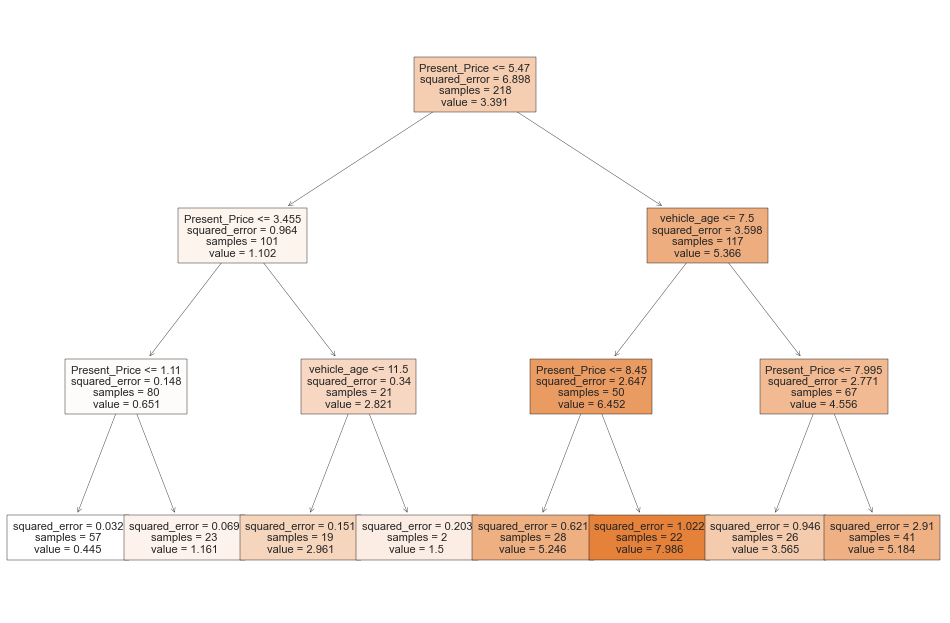

In [55]:
report_model(pruned_tree)  # max_depth=3 yaptim

## GridSearch

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

In [58]:
param_grid = {"DT_model__splitter":["best", "random"],
              "DT_model__max_depth": [3,4,5],  # overfitting'de en önemli parametre max_depth
              "DT_model__min_samples_leaf": [1, 2,3,4],
              "DT_model__min_samples_split": [2,3, 4],
              "DT_model__max_features":[5,6,None]}

In [59]:

grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True)

In [60]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('DT_model',
                                        DecisionTreeRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'DT_model__max_depth': [3, 4, 5],
                         'DT_model__max_features': [5, 6, None],
                         'DT_model__min_samples_leaf': [1, 2, 3, 4],
                         'DT_model__min_samples_split': [2, 3, 4],
                         'DT_model__splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [61]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeRegressor(max_depth=5, min_samples_split=3,
                                       random_state=101))])

In [62]:
grid_model.best_params_

{'DT_model__max_depth': 5,
 'DT_model__max_features': None,
 'DT_model__min_samples_leaf': 1,
 'DT_model__min_samples_split': 3,
 'DT_model__splitter': 'best'}

In [63]:
grid_model.best_index_

194

In [64]:
pd.DataFrame(grid_model.cv_results_).loc[194, ["mean_test_score", "mean_train_score"]]

mean_test_score    -0.778
mean_train_score   -0.527
Name: 194, dtype: object

In [65]:
grid_model.best_score_

-0.777631072846743

In [66]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.954,0.951
mae,0.332,0.420
mse,0.317,0.404
rmse,0.563,0.636


In [67]:
y.mean()

3.4022710622710615

In [68]:
0.636/3.4  # train seti icin hata orani

0.18705882352941178

In [69]:
0.563/3.4  # test seti icin hata orani

0.16558823529411765

In [70]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeRegressor(max_depth=5, min_samples_split=3, 
                                                                                  random_state=101))]

model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 5,
                       return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                              0.908
train_r2                             0.959
test_neg_mean_absolute_error        -0.527
train_neg_mean_absolute_error       -0.315
test_neg_mean_squared_error         -0.615
train_neg_mean_squared_error        -0.281
test_neg_root_mean_squared_error    -0.778
train_neg_root_mean_squared_error   -0.527
dtype: float64

In [71]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.954,0.951
mae,0.332,0.420
mse,0.317,0.404
rmse,0.563,0.636


## Feature İmportance

In [72]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeRegressor(max_depth=5, min_samples_split=3, 
                                                                                  random_state=101))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeRegressor(max_depth=5, min_samples_split=3,
                                       random_state=101))])

In [73]:
X_train.head(1)

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
164,0.540,14000,Petrol,Individual,Manual,0,6


In [74]:
pd.DataFrame(pipe_model["OrdinalEncoder"].fit_transform(X_train), columns=new_features).head()

,Fuel_Type,Seller_Type,Transmission,Present_Price,Kms_Driven,Owner,vehicle_age
0,2.000,1.000,1.000,0.540,14000.000,0.000,6.000
1,2.000,0.000,1.000,4.600,22517.000,0.000,11.000
2,2.000,0.000,1.000,5.900,9800.000,0.000,9.000
3,1.000,0.000,1.000,9.400,49000.000,0.000,9.000
4,2.000,0.000,1.000,18.610,72000.000,0.000,10.000


In [75]:
df_f_i = pd.DataFrame(data = pipe_model["DT_model"].feature_importances_, index=new_features, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_f_i

,Feature Importance
Present_Price,0.869
vehicle_age,0.120
Kms_Driven,0.011
Fuel_Type,0.000
Seller_Type,0.000
Transmission,0.000
Owner,0.000


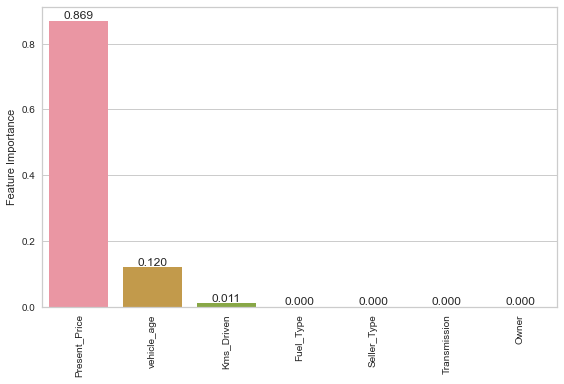

In [76]:
ax = sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation = 90)
plt.tight_layout()

## Compore real and predicted result

In [77]:
y_pred = grid_model.predict(X_test)
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [78]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
153,0.500,0.453,0.047
100,1.750,1.538,0.212
173,0.400,0.427,-0.027
269,6.700,8.500,-1.800
137,0.650,0.236,0.414
267,8.350,8.500,-0.150
200,0.100,0.236,-0.136
117,1.100,1.123,-0.023
169,0.400,0.427,-0.027
205,5.250,5.182,0.068


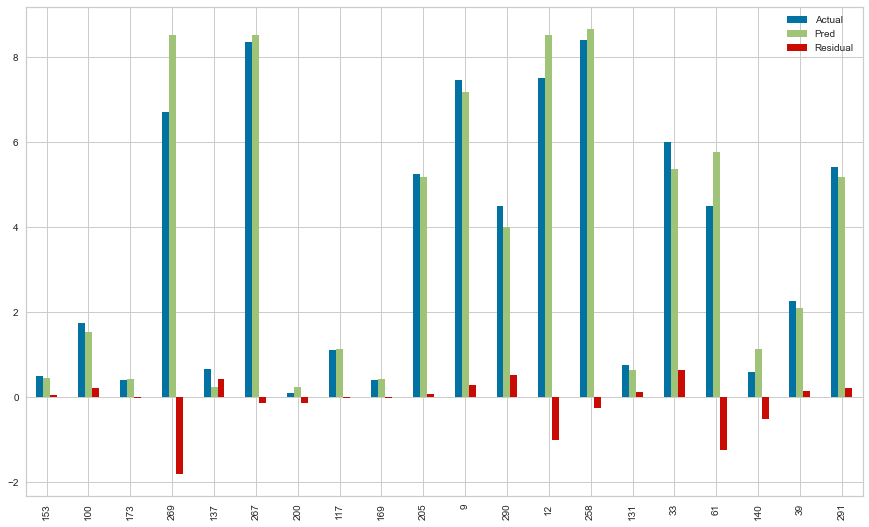

In [79]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

## Final Model

In [80]:
X=df_new.drop("Selling_Price", axis=1)
y=df_new.Selling_Price

In [81]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,5.590,27000,Petrol,Dealer,Manual,0,8
1,9.540,43000,Diesel,Dealer,Manual,0,9
2,9.850,6900,Petrol,Dealer,Manual,0,5
3,4.150,5200,Petrol,Dealer,Manual,0,11
4,6.870,42450,Diesel,Dealer,Manual,0,8


In [82]:
from sklearn.pipeline import Pipeline

operations = [("Ordinalcoder", column_trans), ("DT_model", DecisionTreeRegressor(max_depth=5, min_samples_split=3, 
                                                                                  random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X, y)

Pipeline(steps=[('Ordinalcoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeRegressor(max_depth=5, min_samples_split=3,
                                       random_state=101))])

## Prediction

In [83]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,5.590,27000,Petrol,Dealer,Manual,0,8
1,9.540,43000,Diesel,Dealer,Manual,0,9
2,9.850,6900,Petrol,Dealer,Manual,0,5
3,4.150,5200,Petrol,Dealer,Manual,0,11
4,6.870,42450,Diesel,Dealer,Manual,0,8


In [84]:
X.describe()

,Present_Price,Kms_Driven,Owner,vehicle_age
count,273.000,273.000,273.000,273.000
mean,5.879,36516.941,0.048,8.527
std,4.955,39529.116,0.260,2.943
min,0.320,500.000,0.000,4.000
25%,0.990,15001.000,0.000,6.000
50%,5.700,32000.000,0.000,8.000
75%,8.920,48000.000,0.000,10.000
max,23.730,500000.000,3.000,19.000


In [85]:
samples = {"Present_Price": [7, 9.5],
           "Kms_Driven": [25000, 44000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner":[0,1],
           "vehicle_age":[1, 9]}

In [86]:
df_samples = pd.DataFrame(samples)
df_samples

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,7.000,25000,Petrol,Dealer,Manual,0,1
1,9.500,44000,Diesel,Individual,Automatic,1,9


In [87]:
pipe_model.predict(df_samples)

array([5.865 , 5.4075])